In [ ]:
import os
import vector
import mplhep
import numpy as np
import pandas as pd
import awkward as ak
import boost_histogram as bh
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep
import gc
mplhep.style.use("CMS")

In [ ]:
qq_test = ak.from_parquet(r"qq_train.parquet")
z_test = ak.from_parquet(r"z_train.parquet")
zh_test = ak.from_parquet(r"zh_train.parquet")

In [ ]:
# Create 4-vectors from the information in the .parquet file test and access information such as energy or pT:

def to_p4(p4_obj):
    return vector.awk(
        ak.zip(
            {
                "mass": p4_obj.tau,
                "x": p4_obj.x,
                "y": p4_obj.y,
                "z": p4_obj.z,
            }
        )
    )
def my_to_ptphietaenergy(p4_obj):
    return vector.awk(
        ak.zip(
            {
                "pt": p4_obj.pt,
                "phi": p4_obj.phi,
                "eta": p4_obj.rapidity,
                "E": p4_obj.E
            }
        )
    )

def to_bh(test, bins, cumulative=False):
    h1 = bh.Histogram(bh.axis.Variable(bins))
    h1.fill(test)
    if cumulative:
        h1[:] = np.sum(h1.values()) - np.cumsum(h1)
    return h1

# ZH
zh_gen_tau_p4s = to_p4(zh_test.gen_jet_tau_p4s)
zh_reco_cand_p4s = to_p4(zh_test.reco_cand_p4s)
zh_reco_jet_p4s = to_p4(zh_test.reco_jet_p4s)

zh_test["4momentum"] = my_to_ptphietaenergy(zh_reco_cand_p4s)
# Z
z_gen_tau_p4s = to_p4(z_test.gen_jet_tau_p4s)
z_reco_cand_p4s = to_p4(z_test.reco_cand_p4s)
z_reco_jet_p4s = to_p4(z_test.reco_jet_p4s)
z_gen_tau_pt = z_gen_tau_p4s.pt
z_test["4momentum"] = my_to_ptphietaenergy(z_reco_cand_p4s)
#qq
qq_test_reco_cand_p4s = to_p4(qq_test["reco_cand_p4s"])
qq_test_reco_jet_p4s = to_p4(qq_test["reco_jet_p4s"])
qq_test["4momentum"] = my_to_ptphietaenergy(qq_test_reco_jet_p4s)

In [ ]:
#zh
phis = zh_reco_cand_p4s_phieta.phi
etas = zh_reco_cand_p4s_phieta.eta
rho = zh_reco_cand_p4s_phieta.rho
dxdy = zh_data.reco_cand_dxy
#qq
phis2 = qq_data_reco_cand_p4s_phieta.phi
etas2 = qq_data_reco_cand_p4s_phieta.eta
rho2 = qq_data_reco_cand_p4s_phieta.rho
dxdy2 = qq_data.reco_cand_dxy
#z
phis3 = z_reco_cand_p4s_phieta.phi
etas3 = z_reco_cand_p4s_phieta.eta
rho3 = z_reco_cand_p4s_phieta.rho
dxdy3 = z_data.reco_cand_dxy

In [ ]:
phis = ak.to_numpy(ak.flatten(phis))
etas=ak.to_numpy(ak.flatten(etas))
rhos=ak.to_numpy(ak.flatten(rho))
dxdy = ak.to_numpy(ak.flatten(dxdy))
##qq
phis2 = ak.to_numpy(ak.flatten(phis2))
etas2=ak.to_numpy(ak.flatten(etas2))
rhos2=ak.to_numpy(ak.flatten(rho2))
dxdy2 = ak.to_numpy(ak.flatten(dxdy2))

#z
phis3 = ak.to_numpy(ak.flatten(phis3))
etas3=ak.to_numpy(ak.flatten(etas3))
rhos3=ak.to_numpy(ak.flatten(rho3))
dxdy3 = ak.to_numpy(ak.flatten(dxdy3))


In [ ]:
myphis = pd.Series(phis)
myetas = pd.Series(etas)
myrho = pd.Series(rhos)
dxdy = pd.Series(dxdy)
#
myphis2 = pd.Series(phis2)
myetas2 = pd.Series(etas2)
myrho2 = pd.Series(rhos2)
dxdy2 = pd.Series(dxdy2)

#
myphis3 = pd.Series(phis3)
myetas3 = pd.Series(etas3)
myrho3 = pd.Series(rhos3)
dxdy3 = pd.Series(dxdy3)

In [ ]:


radius   = 2 * myetas
angles   = (180) * myphis
colors = myrho
radius2   = 2 * myetas2
angles2   = (180) * myphis2
colors2 = myrho2
radius3   = 2 * myetas3
angles3   = (180) * myphis3
colors3 = myrho3

fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
fig.set_size_inches(29,9)
fig.tight_layout()
axs[0].scatter(angles, radius, c=colors, s=mydxdy*10,alpha=1,cmap=plt.cm.hsv)
axs[0].set_title("ZH")
axs[1].scatter(angles2, radius2, c=colors2, s=mydxdy2*10,alpha=1,cmap=plt.cm.hsv)
axs[1].set_title("qq")
axs[2].scatter(angles3, radius3, c=colors3, s=mydxdy3*10,alpha=1,cmap=plt.cm.hsv)
axs[2].set_title("Z")

"""a = .scatter(angles, radius, c=colors, s=mydxdy*15,alpha=1,cmap=plt.cm.hsv, polar = True)"""

fig.tight_layout()
from matplotlib.cm import ScalarMappable
cmap = plt.get_cmap("hsv")
norm = plt.Normalize(myphis.min(), myphis.max())
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[:])
cbar.norm
plt.show()
fig.savefig("visualization-radar-buble-plot.png")

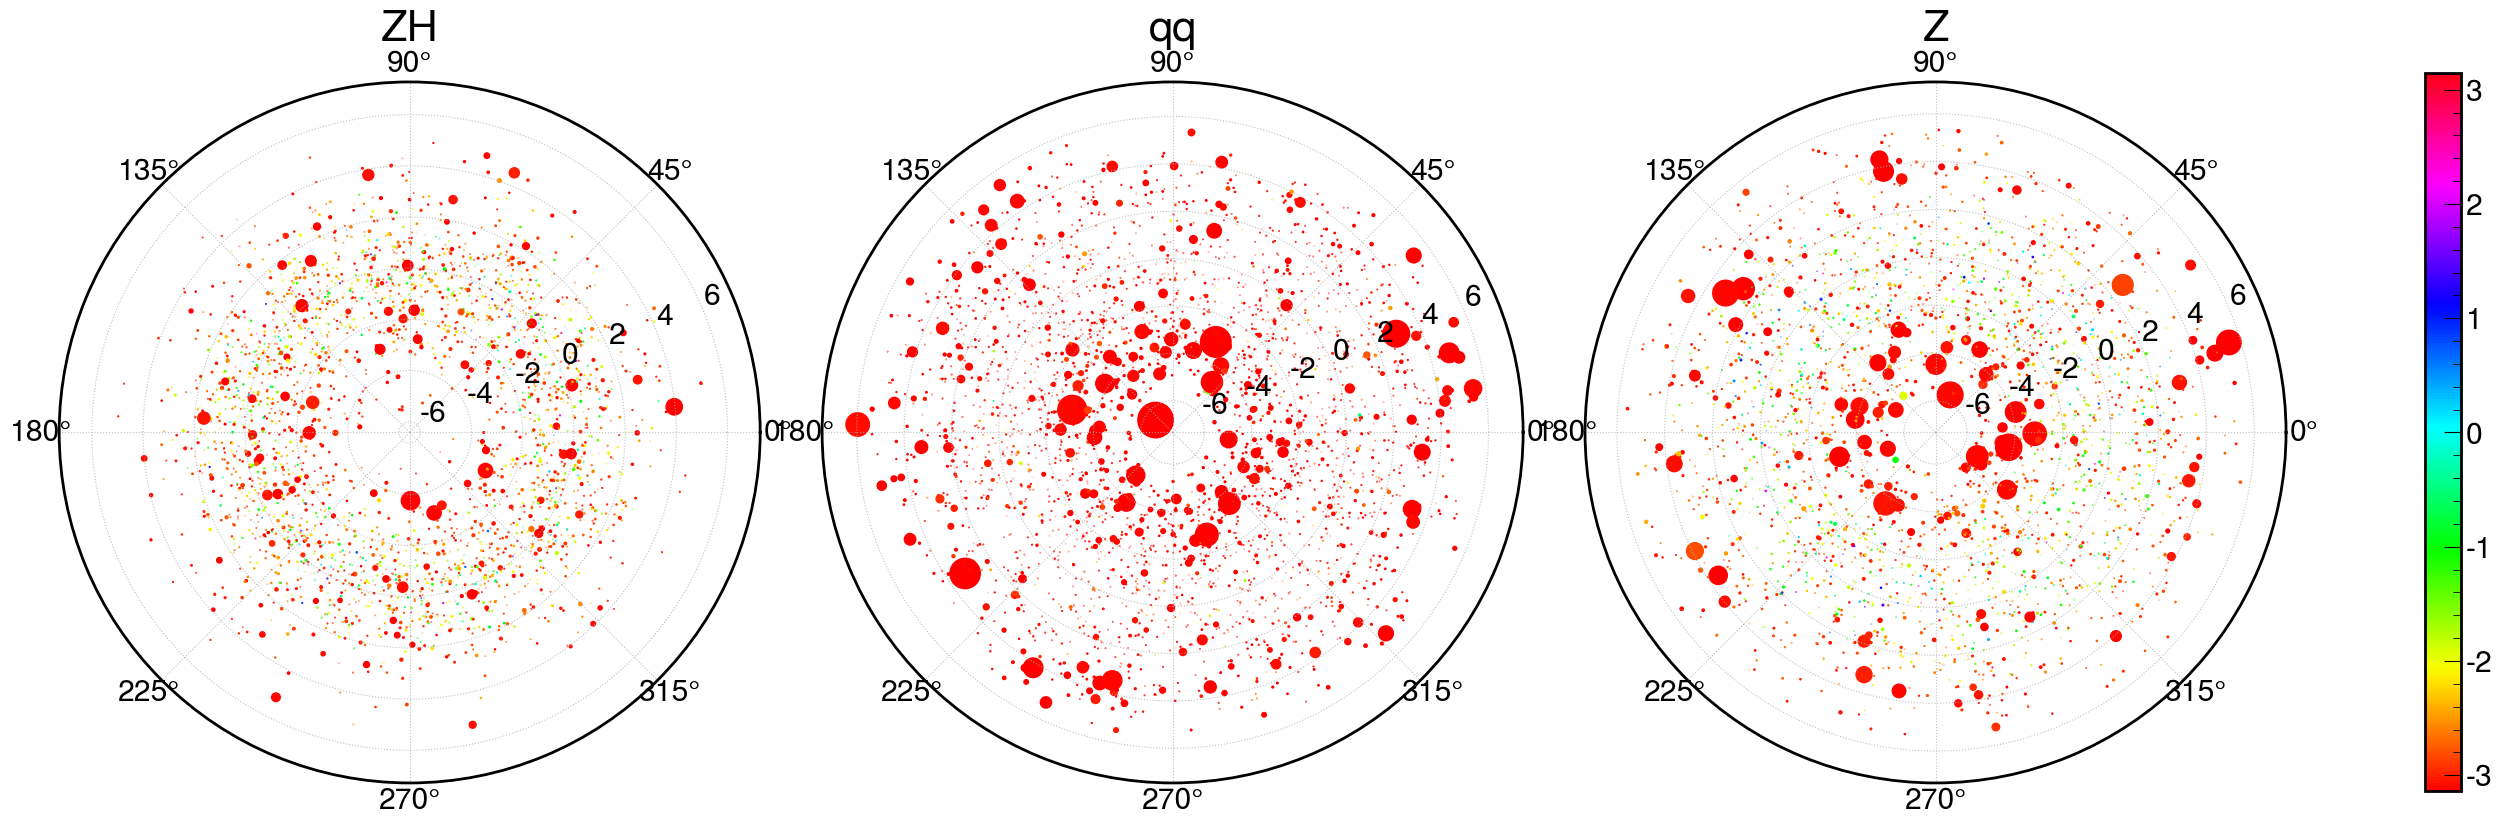

In [ ]:
plt.hist(np.abs(ak.flatten(z_delta_eta)), bins=100);
plt.xlabel("$|\Delta \eta|$")
plt.ylabel("number of particles")
plt.title("Fraction of particles $|\Delta \eta|<0.8$ = {:.2f}".format(np.sum(np.abs(ak.flatten(z_delta_eta))<0.8) / ak.count(z_delta_eta)))

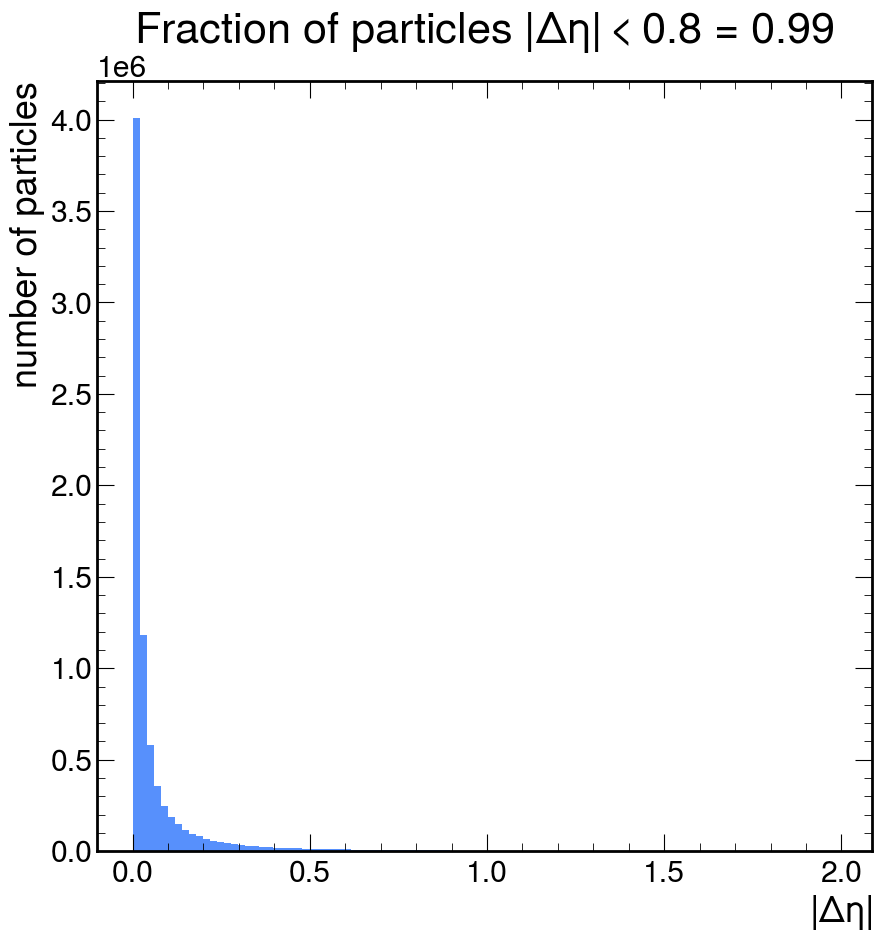